In [ ]:
# BLOCO 1 - IMPORTAÇÃO DE BIBLIOTECAS


import pandas as pd              # importa a biblioteca pandas para trabalhar com tabelas (DataFrames)
import numpy as np               # importa a biblioteca numpy para cálculos numéricos
import matplotlib.pyplot as plt  # importa o matplotlib.pyplot para criação de gráficos
import seaborn as sns            # importa o seaborn para gráficos estatísticos mais bonitos

from sklearn.cluster import KMeans          # importa o KMeans para fazer agrupamento (clustering)
from sklearn.preprocessing import StandardScaler  # importa o StandardScaler para padronizar as variáveis numéricas
from sklearn.metrics import silhouette_score      # importa a função para calcular o índice de silhueta

from mpl_toolkits.mplot3d import Axes3D     # importa o módulo que habilita gráficos em 3D no matplotlib

sns.set()                    # define um estilo padrão para os gráficos do seaborn

# garante que os gráficos apareçam dentro do notebook
%matplotlib inline           


In [4]:
# BLOCO 2 - CARREGAMENTO DA BASE DE DADOS


caminho_arquivo = "dadosacoes.csv"  # define o nome do arquivo CSV que contém os dados fornecidos pelo professor

df = pd.read_csv(caminho_arquivo)   # lê o arquivo CSV e armazena os dados em um DataFrame chamado df

df.head()                           # exibe as 5 primeiras linhas da tabela para conferir se a leitura deu certo


,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [5]:
# BLOCO 3 - AJUSTE DOS NOMES DAS COLUNAS


print("Colunas originais:", df.columns.tolist())  # mostra a lista de colunas exatamente como vieram do CSV

mapeamento_colunas = {                             # cria um dicionário para renomear as colunas
    "nome ação": "Nome_acao",                      # renomeia 'nome ação' para 'Nome_acao'
    "preço ação R$": "Preco_acao",                 # renomeia 'preço ação R$' para 'Preco_acao'
    "qtde cotas": "Qtde_cotas",                    # renomeia 'qtde cotas' para 'Qtde_cotas'
    "valor de mercado R$ -(Bilhões)": "Valor_mercado"  # renomeia 'valor de mercado R$ -(Bilhões)' para 'Valor_mercado'
}

df = df.rename(columns=mapeamento_colunas)         # aplica a renomeação ao DataFrame df

print("Colunas após renomear:", df.columns.tolist())  # mostra as colunas depois da renomeação

df.head()                                          # exibe novamente as primeiras linhas para confirmar o resultado


Colunas originais: ['nome ação', 'preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']
Colunas após renomear: ['Nome_acao', 'Preco_acao', 'Qtde_cotas', 'Valor_mercado']


,Nome_acao,Preco_acao,Qtde_cotas,Valor_mercado
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [6]:
# BLOCO 4 - EXPLORAÇÃO INICIAL DOS DADOS


df.info()        # mostra informações gerais do DataFrame (tipos de dados, quantidade de valores não nulos, etc.)

df.describe()    # mostra estatísticas descritivas das colunas numéricas (média, desvio padrão, mínimo, quartis, máximo)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nome_acao      100 non-null    object
 1   Preco_acao     100 non-null    int64 
 2   Qtde_cotas     100 non-null    int64 
 3   Valor_mercado  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


,Preco_acao,Qtde_cotas,Valor_mercado
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [7]:
df.describe(include="all")  # mostra estatísticas tanto de colunas numéricas quanto de texto (object)


,Nome_acao,Preco_acao,Qtde_cotas,Valor_mercado
count,100,100.000000,100.000000,100.00000
unique,7,NaN,NaN,NaN
top,GOOGLE,NaN,NaN,NaN
freq,25,NaN,NaN,NaN
mean,NaN,136.140000,52.010000,2433.70000
std,NaN,75.237942,27.475791,1397.29373
min,NaN,15.000000,2.000000,52.00000
25%,NaN,67.000000,28.250000,1189.25000
50%,NaN,121.500000,55.500000,2433.00000
75%,NaN,209.000000,76.500000,3616.50000


In [ ]:
# BLOCO 5 - VERIFICAÇÃO DE VALORES AUSENTES


faltantes_por_coluna = df.isna().sum()    # calcula quantos valores ausentes (NaN) existem em cada coluna

print("Valores ausentes por coluna:")     # imprime um título para facilitar leitura
print(faltantes_por_coluna)              # exibe a quantidade de faltantes por coluna


Valores ausentes por coluna:
Nome_acao        0
Preco_acao       0
Qtde_cotas       0
Valor_mercado    0
dtype: int64


In [9]:
# BLOCO 6 - TRATAMENTO DE VALORES AUSENTES


print("Tamanho original do DataFrame:", df.shape)  # mostra o número de linhas e colunas antes da limpeza

df_limpo = df.dropna()                            # remove linhas que tenham qualquer valor ausente (NaN)

print("Tamanho após remoção de linhas com NaN:", df_limpo.shape)  # mostra o tamanho depois da remoção

df_limpo.head()                                   # exibe as primeiras linhas do DataFrame já "limpo"


Tamanho original do DataFrame: (100, 4)
Tamanho após remoção de linhas com NaN: (100, 4)


,Nome_acao,Preco_acao,Qtde_cotas,Valor_mercado
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


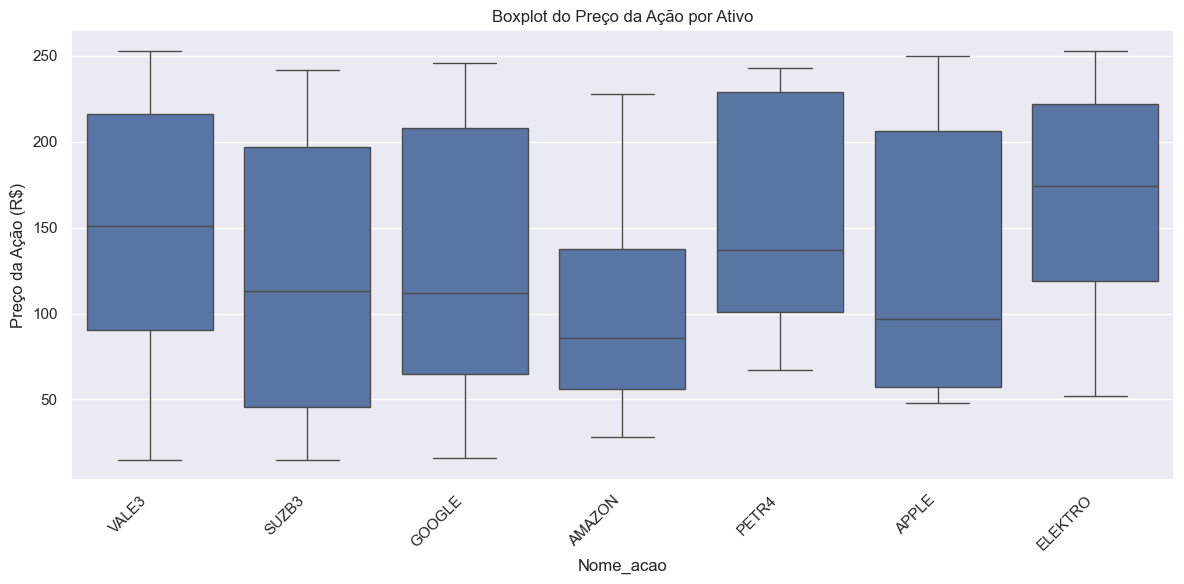

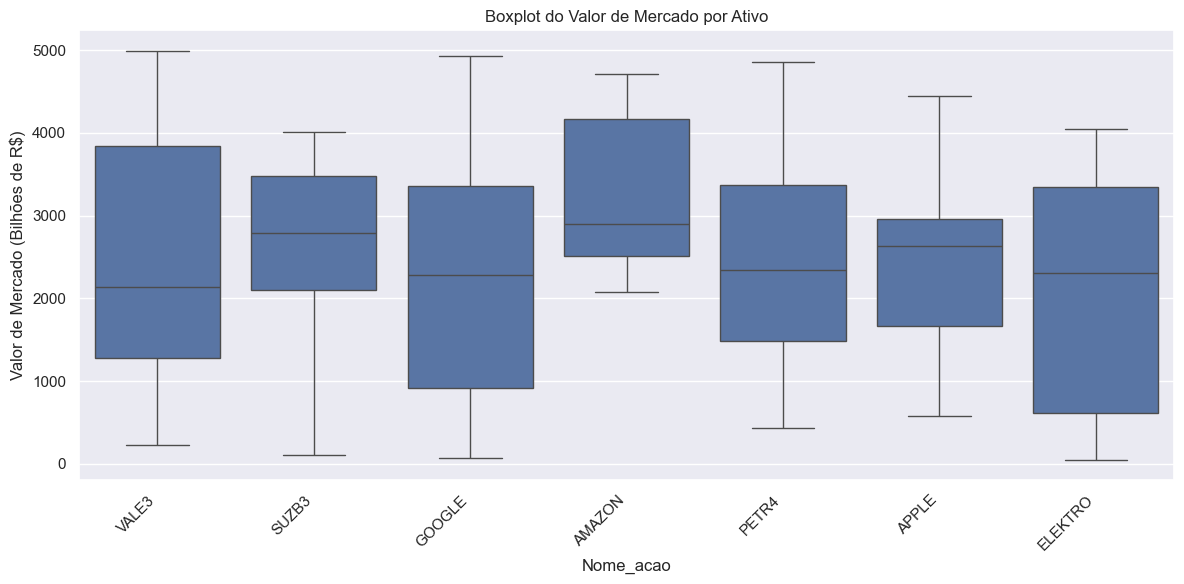

In [10]:
# BLOCO 7 - BOXPLOTS COM SEABORN


plt.figure(figsize=(12, 6))                                     # define o tamanho da figura do primeiro boxplot

sns.boxplot(data=df_limpo, x="Nome_acao", y="Preco_acao")       # cria um boxplot do preço da ação por ativo

plt.xticks(rotation=45, ha="right")                             # rotaciona os rótulos do eixo x para melhor leitura
plt.title("Boxplot do Preço da Ação por Ativo")                 # define o título do gráfico
plt.ylabel("Preço da Ação (R$)")                               # define o rótulo do eixo y
plt.tight_layout()                                              # ajusta o layout para não cortar textos
plt.show()                                                      # exibe o gráfico na tela



plt.figure(figsize=(12, 6))                                     # define o tamanho da figura do segundo boxplot

sns.boxplot(data=df_limpo, x="Nome_acao", y="Valor_mercado")    # cria um boxplot do valor de mercado por ativo

plt.xticks(rotation=45, ha="right")                             # rotaciona rótulos do eixo x
plt.title("Boxplot do Valor de Mercado por Ativo")              # define o título do gráfico
plt.ylabel("Valor de Mercado (Bilhões de R$)")                  # define o rótulo do eixo y
plt.tight_layout()                                              # ajusta o layout
plt.show()                                                      # exibe o gráfico na tela


In [ ]:
# BLOCO 8 - TRANSFORMAÇÃO DA VARIÁVEL CATEGÓRICA (GET_DUMMIES)


df_modelo = df_limpo.copy()                                     # cria uma cópia de df_limpo para usar na modelagem

df_modelo = pd.get_dummies(df_modelo,                           # aplica a criação de variáveis dummies
                           columns=["Nome_acao"],               # indica que a coluna categórica é 'Nome_acao'
                           drop_first=True)                     # remove a primeira categoria para evitar multicolinearidade

df_modelo.head()                                                # exibe as primeiras linhas do DataFrame transformado


,Preco_acao,Qtde_cotas,Valor_mercado,Nome_acao_APPLE,Nome_acao_ELEKTRO,Nome_acao_GOOGLE,Nome_acao_PETR4,Nome_acao_SUZB3,Nome_acao_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [12]:
# BLOCO 9 - SELEÇÃO DE FEATURES E PADRONIZAÇÃO


colunas_numericas = ["Preco_acao", "Qtde_cotas", "Valor_mercado"]   # define as colunas numéricas principais para o clustering

colunas_dummies = [col for col in df_modelo.columns                 # cria uma lista com as colunas dummies
                   if col.startswith("Nome_acao_")]                 # filtra apenas as colunas que começam com 'Nome_acao_'

colunas_features = colunas_numericas + colunas_dummies              # junta as colunas numéricas e as dummies em uma lista só

X = df_modelo[colunas_features]                                     # cria a matriz de features X com as colunas selecionadas

scaler = StandardScaler()                                           # instancia o StandardScaler para padronizar os dados

X_scaled = scaler.fit_transform(X)                                  # ajusta o scaler aos dados e transforma X em X_scaled

print("Formato de X_scaled (linhas, colunas):", X_scaled.shape)     # mostra o tamanho da matriz padronizada


Formato de X_scaled (linhas, colunas): (100, 9)


In [13]:
# BLOCO 10 - K-MEANS COM k = 4, 5 E 8


lista_k = [4, 5, 8]                               # cria uma lista com os valores de k que serão testados

modelos_kmeans = {}                               # cria um dicionário vazio para guardar os modelos ajustados

for k in lista_k:                                 # inicia um laço para percorrer cada valor de k
    kmeans = KMeans(n_clusters=k,                 # cria um modelo KMeans com k clusters
                    random_state=42,              # define random_state para reprodutibilidade
                    n_init=10)                    # define quantas inicializações diferentes serão testadas
    
    kmeans.fit(X_scaled)                          # treina (ajusta) o modelo com os dados padronizados
    
    modelos_kmeans[k] = kmeans                    # armazena o modelo treinado no dicionário, usando k como chave
    
    nome_coluna_cluster = f"cluster_{k}"          # define o nome da coluna que conterá os rótulos de cluster
    
    df_modelo[nome_coluna_cluster] = kmeans.labels_  # adiciona os rótulos de cluster ao DataFrame df_modelo
    
    print(f"\n=== Resultados para k = {k} ===")   # imprime um cabeçalho indicando o valor de k
    
    print(df_modelo[nome_coluna_cluster]          # mostra quantas linhas caíram em cada cluster
          .value_counts())                        # usando o value_counts para contar por cluster
    
    print("Inércia (kmeans.inertia_):",           # imprime o valor de inércia do modelo
          kmeans.inertia_)                        



=== Resultados para k = 4 ===
cluster_4
3    48
0    25
1    14
2    13
Name: count, dtype: int64
Inércia (kmeans.inertia_): 540.6993686266513

=== Resultados para k = 5 ===
cluster_5
2    33
3    25
0    15
4    14
1    13
Name: count, dtype: int64
Inércia (kmeans.inertia_): 434.31168734291947

=== Resultados para k = 8 ===
cluster_8
3    15
5    14
6    14
4    13
7    12
0    11
1    11
2    10
Name: count, dtype: int64
Inércia (kmeans.inertia_): 254.23387737238204


c:\Users\João\Desktop\Somativa_IABD\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\João\Desktop\Somativa_IABD\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\João\Desktop\Somativa_IABD\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **

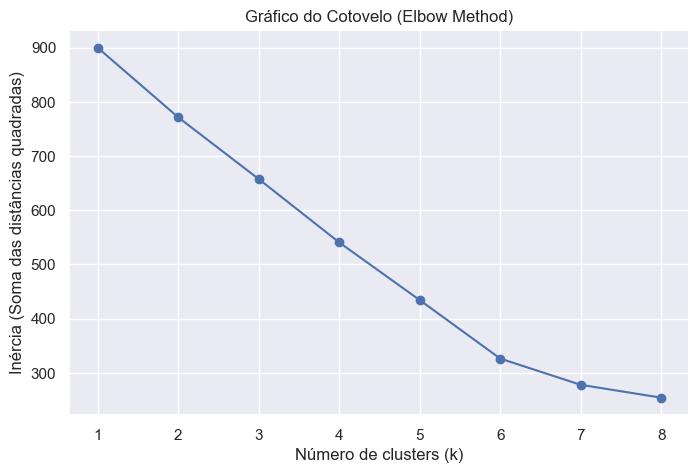

In [14]:
# BLOCO 11 - GRÁFICO DO COTOVELO (ELBOW METHOD)


k_values = list(range(1, 9))                      # define a lista de valores de k de 1 até 8

inertias = []                                     # cria uma lista vazia para armazenar a inércia de cada k

for k in k_values:                                # inicia um laço para cada valor de k
    kmeans = KMeans(n_clusters=k,                 # cria um modelo KMeans com k clusters
                    random_state=42,              # define random_state para reprodutibilidade
                    n_init=10)                    # define o número de inicializações
    
    kmeans.fit(X_scaled)                          # ajusta o modelo aos dados padronizados
    
    inertias.append(kmeans.inertia_)              # adiciona a inércia resultante na lista de inertias

plt.figure(figsize=(8, 5))                        # cria uma nova figura com tamanho 8x5

plt.plot(k_values, inertias, marker="o")          # plota a curva de k (eixo x) vs inércia (eixo y) com marcadores

plt.title("Gráfico do Cotovelo (Elbow Method)")   # define o título do gráfico
plt.xlabel("Número de clusters (k)")              # define o rótulo do eixo x
plt.ylabel("Inércia (Soma das distâncias quadradas)")  # define o rótulo do eixo y

plt.show()                                        # exibe o gráfico na tela


k = 2 -> Silhueta média = 0.1337
k = 3 -> Silhueta média = 0.2092
k = 4 -> Silhueta média = 0.2796
k = 5 -> Silhueta média = 0.3484
k = 6 -> Silhueta média = 0.4133
k = 7 -> Silhueta média = 0.3686
k = 8 -> Silhueta média = 0.3611


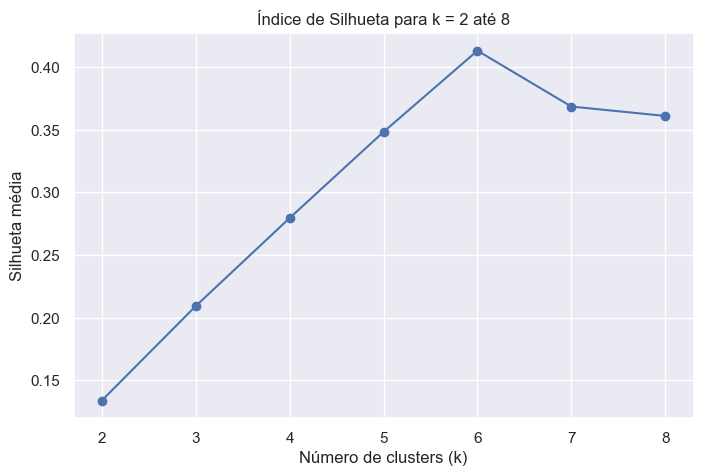

In [15]:
# BLOCO 12 - GRÁFICO DA SILHUETA


k_values_sil = list(range(2, 9))                  # define os valores de k de 2 até 8 (silhueta não faz sentido para k=1)

silhuetas = []                                    # cria uma lista vazia para guardar os valores de silhueta

for k in k_values_sil:                            # inicia um laço sobre os valores de k
    kmeans = KMeans(n_clusters=k,                 # cria um modelo KMeans com k clusters
                    random_state=42,              # define random_state
                    n_init=10)                    # define o número de inicializações
    
    labels = kmeans.fit_predict(X_scaled)         # ajusta o modelo e já obtém os rótulos de cluster
    
    score = silhouette_score(X_scaled, labels)    # calcula o índice de silhueta para esses rótulos
    
    silhuetas.append(score)                       # adiciona o score de silhueta à lista
    
    print(f"k = {k} -> Silhueta média = {score:.4f}")  # imprime o valor da silhueta para esse k

plt.figure(figsize=(8, 5))                        # cria uma nova figura com tamanho 8x5

plt.plot(k_values_sil, silhuetas, marker="o")     # plota a curva de k vs silhueta média

plt.title("Índice de Silhueta para k = 2 até 8")  # define o título do gráfico
plt.xlabel("Número de clusters (k)")              # define o rótulo do eixo x
plt.ylabel("Silhueta média")                      # define o rótulo do eixo y

plt.show()                                        # exibe o gráfico na tela


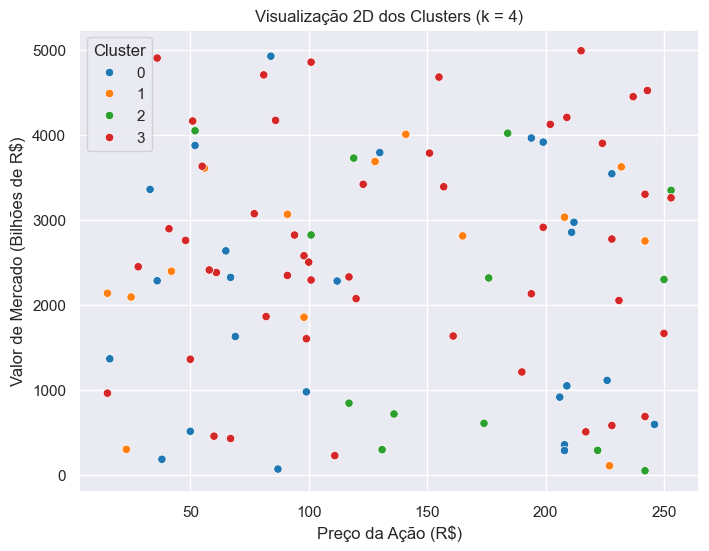

In [16]:
# BLOCO 13 - VISUALIZAÇÃO 2D DOS CLUSTERS (k = 4)


k_visualizar = 4                                  # define o valor de k que será usado na visualização

col_cluster = f"cluster_{k_visualizar}"           # monta o nome da coluna que contém os rótulos de cluster

plt.figure(figsize=(8, 6))                        # cria uma figura de tamanho 8x6

sns.scatterplot(data=df_modelo,                   # usa df_modelo como fonte de dados
                x="Preco_acao",                   # define o eixo x como o preço da ação
                y="Valor_mercado",                # define o eixo y como o valor de mercado
                hue=col_cluster,                  # define a cor dos pontos de acordo com o cluster
                palette="tab10")                  # escolhe uma paleta de cores categórica

plt.title(f"Visualização 2D dos Clusters (k = {k_visualizar})")  # título do gráfico
plt.xlabel("Preço da Ação (R$)")                  # rótulo do eixo x
plt.ylabel("Valor de Mercado (Bilhões de R$)")    # rótulo do eixo y

plt.legend(title="Cluster")                       # adiciona legenda com o título "Cluster"

plt.show()                                        # exibe o gráfico


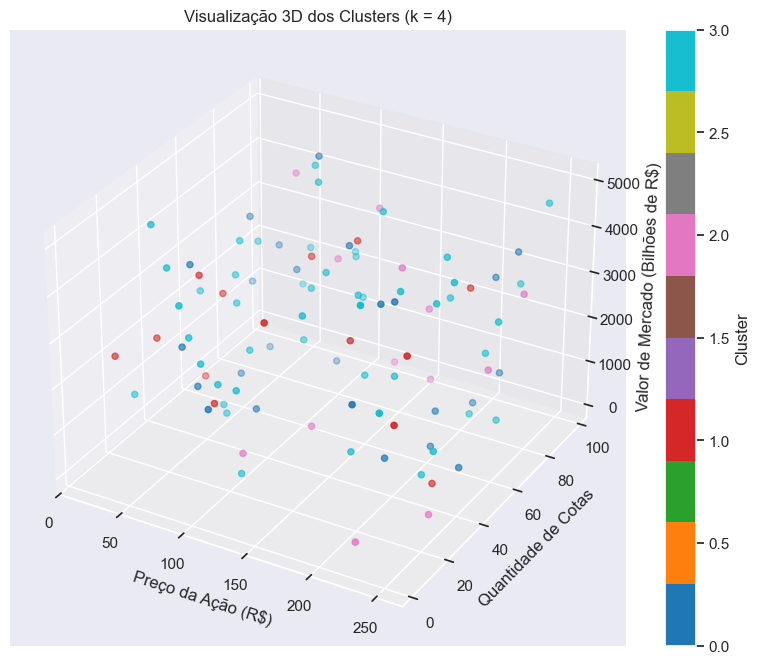

In [17]:
# BLOCO 14 - VISUALIZAÇÃO 3D DOS CLUSTERS (k = 4)


fig = plt.figure(figsize=(10, 8))                 # cria uma figura de tamanho 10x8
ax = fig.add_subplot(111, projection="3d")        # adiciona um eixo em 3D à figura

x = df_modelo["Preco_acao"]                       # define x como o preço da ação
y = df_modelo["Qtde_cotas"]                       # define y como a quantidade de cotas
z = df_modelo["Valor_mercado"]                    # define z como o valor de mercado

clusters = df_modelo["cluster_4"]                 # obtém os rótulos de cluster para k = 4

scatter = ax.scatter(x, y, z,                     # cria o gráfico de dispersão 3D
                     c=clusters,                  # define a cor de cada ponto pelo cluster
                     cmap="tab10")                # usa uma paleta categórica de 10 cores

ax.set_xlabel("Preço da Ação (R$)")               # define o rótulo do eixo x
ax.set_ylabel("Quantidade de Cotas")              # define o rótulo do eixo y
ax.set_zlabel("Valor de Mercado (Bilhões de R$)") # define o rótulo do eixo z

ax.set_title("Visualização 3D dos Clusters (k = 4)")  # define o título do gráfico 3D

fig.colorbar(scatter, ax=ax, label="Cluster")     # adiciona uma barra de cores indicando os clusters

plt.show()                                        # exibe o gráfico 3D


In [ ]:
### Questão 5 – Maior vantagem do aprendizado não supervisionado

A maior vantagem do aprendizado **não supervisionado** em relação ao aprendizado
**supervisionado** é que ele **não precisa de dados rotulados** (labels).

Rotular exemplos (dizer qual é a classe correta de cada linha) costuma ser caro,
demorado e, às vezes, inviável. O aprendizado não supervisionado consegue descobrir
**padrões, grupos e estruturas escondidas** usando apenas as características (features),
sem precisar de uma resposta correta pré-definida.

Assim, ele permite extrair conhecimento útil de grandes conjuntos de dados
**não rotulados**, o que é uma grande vantagem prática em comparação com
o aprendizado supervisionado.
